<a href="https://colab.research.google.com/github/jonnes-nascimento/iniciacao_cientifica/blob/master/IC_USJT_2020_COVID_19_Dados_Gerais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando os dados e fazendo o tratamento básico

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uri = "https://gist.githubusercontent.com/jonnes-nascimento/2c1cf5448199656ba0918e28167aad9c/raw/200927a50d9e8150488c51574b4cc5907fd02848/brazil_covid19_macro.csv"

# lê os dados do dataset no Gist
dados = pd.read_csv(uri)

# apaga a coluna country pois os dados já trazem somente informações do Brasil
dados = dados.drop(columns = ['country'], axis=1)

# definição dos novos nomes das colunas
a_renomear = {
    "date" : "Data",
    "week" : "Semana",
    "cases" : "Casos",
    "deaths" : "Mortes",
    "recovered" : "Recuperados",
    "monitoring" : "Monitorados"
}

# renomeia as colunas
dados = dados.rename(columns = a_renomear)

# converte a coluna de data
dados['Data'] = pd.to_datetime(dados['Data'], format='%Y-%m-%d')

# extrai o mes e ano da data em novas colunas
dados['Mes'] = pd.DatetimeIndex(dados['Data']).month

a_substituir = {
    1 : 'Janeiro',
    2 : 'Fevereiro',
    3 : 'Março',
    4 : 'Abril',
    5 : 'Maio',
    6 : 'Junho',
    7 : 'Julho',
    8 : 'Agosto',
    9 : 'Setembro',
    10 : 'Outubro',
    11 : 'Novembro',
    12 : 'Dezembro'
}

dados['Mes_Desc'] = dados['Mes'].map(a_substituir)
dados['Ano'] = pd.DatetimeIndex(dados['Data']).year

# gera um dataframe com os dados e preenche os espaços em branco, nas colunas de valores, com zero
df = pd.DataFrame(dados).fillna(0)

# exibe os últimos 5 registros do dataset
df.tail()

,Data,Semana,Casos,Mortes,Recuperados,Monitorados,Mes,Mes_Desc,Ano
126,2020-06-30,27,1402041,59594,790040.0,552407.0,6,Junho,2020
127,2020-07-01,27,1448753,60632,826866.0,561255.0,7,Julho,2020
128,2020-07-02,27,1496858,61884,852816.0,582158.0,7,Julho,2020
129,2020-07-03,27,1539081,63174,868372.0,607535.0,7,Julho,2020
130,2020-07-04,27,1577004,64265,876359.0,636380.0,7,Julho,2020


#Analisando os dados

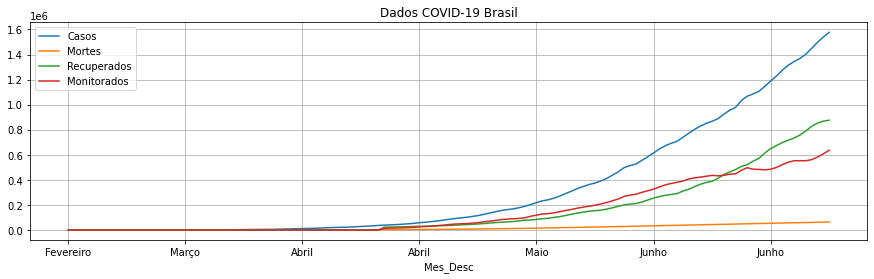

In [41]:
ax = plt.gca()

df[['Mes_Desc', 'Casos', 'Mortes', 'Recuperados', 'Monitorados']].plot(
    figsize=(15,4),
    kind='line',
    x='Mes_Desc',
    title='Dados COVID-19 Brasil',
    grid=True, ax=ax)